In [46]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs
import seaborn as sns

In [11]:
lat_SGP = 36. + 36./60. + 26.3592/360.
lon_SGP = -(97 + 29./60. + 15.5148/360.)
print(lat_SGP, lon_SGP)

36.67322 -97.52643


In [30]:

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'MYBRGB.A2012162.2030.061.2018040182651.jpg'
                     )

fname = 'G:/My Drive/MyGit/1st_obs_evid_subww_wb/MODIS_image_casestudy/snapshot-2010-06-10T00_00_00Z.jpg'

In [31]:
img.shape

(5432, 5654, 3)

In [39]:
dlon = 0.00054933507955236
nlon = 5432
lonst = -99.649023899159
lonend = lonst + dlon*nlon

dlat = 0.00054936284057316
nlat = 5654
latend = 38.101733482296
latst = latend - dlat*nlat


indlon0 = round(((lon_SGP - 0.5) - lonst)/dlon)
indlon1 = round(((lon_SGP + 0.5) - lonst)/dlon)

indlat0 = round(((lat_SGP - 0.5) - latst)/dlat)
indlat1 = round(((lat_SGP + 0.5) - latst)/dlat)

In [43]:
lonst

-99.649023899159

In [40]:
int(indlon0)

2954

In [41]:
img.shape

(5432, 5654, 3)

Text(0.05, 0.05, 'a')

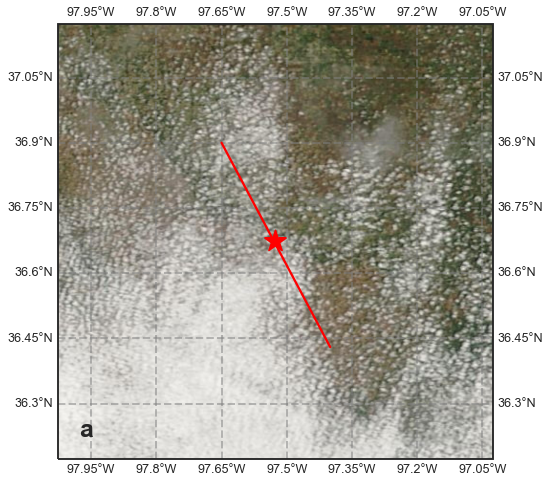

In [73]:
sns.set(context="talk", style="ticks", font_scale=0.7)

fig = plt.figure(figsize=(8, 8))

# img_extent = (lonst, lonend, latst, latend)
img = plt.imread(fname)

img_extent = (lon_SGP - 0.5, lon_SGP + 0.5, lat_SGP - 0.5, lat_SGP + 0.5)
img_plt = img[indlon0:indlon1, indlat0:indlat1, :]

ax = plt.axes(projection=ccrs.PlateCarree())
# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img_plt, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

ax.scatter(lon_SGP,lat_SGP, marker = '*', color = 'red', s =500)

ax.plot([-97.4, -97.65],[36.43, 36.9], color = 'red')

ax.text(0.05, 0.05, 'a', transform=ax.transAxes,fontsize=25, fontweight='bold')